In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import mysql.connector

### Outils/Function

In [2]:

config = {
  'user': 'root',
  'password': 'root',
  'host': 'localhost',
  "port": 3306,
  'database': 'sdd4',
  'raise_on_warnings': True
}

bdd = mysql.connector.connect(**config)

In [3]:
def import_sp500_table(bdd)->pd.DataFrame:
    cursor = bdd.cursor()
    cursor.execute("SELECT * FROM standardandpoor")
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(cursor.fetchall(),columns = columns)
    df["observation_date"] = pd.to_datetime(df["observation_date"])
    df = df.set_index("idSP")

    return df


def import_inflation_table(bdd) ->pd.DataFrame:
    cursor = bdd.cursor()
    cursor = bdd.cursor()
    cursor.execute("SELECT * FROM inflation")
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(cursor.fetchall(),columns=columns)
    df["observation_date"] = pd.to_datetime(df["observation_date"])
    df["CPI"] = df["CPI"].map(lambda x: float(x))
    df = df.set_index("idI")

    return df

def window_data(df:pd.DataFrame):
    x = []
    y = [] 
    for i in range(len(df)-1):
        x.append(df.iloc[i])
        y.append(df.iloc[i + 1])

    return x,y

def plot_corr(df:pd.DataFrame,figsize:tuple = (15,8),title: str = None) -> None: 
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(),annot=True, fmt=".2f", cmap="coolwarm")
    if title:
        plt.title(title)
    plt.xticks(fontsize=8)  
    plt.yticks(fontsize=8)

    plt.show()

def plot_linear(df:pd.DataFrame,title:str = None,figsize:tuple = (15,8)) -> None:
    x,y = window_data(df)
    plt.figure(figsize=figsize)
    plt.plot(x,y,"o")
    if title:
        plt.title(title)
    plt.xlabel(f"{df.name} Times: t")
    plt.ylabel(f"{df.name} Times: t+1")

    plt.show()

def plot_datetime(df:pd.DataFrame,y_index_name: str,date_index_name: str = "observation_date",title: str = None,figsize:tuple = (15,8)) -> None:
    x = pd.to_datetime(df[date_index_name])
    y = df[y_index_name]
    plt.figure(figsize=figsize)
    plt.plot(x,y)
    plt.xlabel(y_index_name)
    plt.ylabel(date_index_name)
    if title: 
        plt.title(title)

    plt.show()

def plot_boxplot(df:pd.DataFrame,x_index_name:str,figsize:tuple = (15,8)):
    plt.figure(figsize=figsize)
    plt.boxplot(df[x_index_name])
    plt.title(f"Boxplot de {x_index_name}")
    plt.show()
    
def plot_histplot(df:pd.DataFrame,x_index_name,figsize: tuple = (15,8), y_label: str = "nombre d'observation",bins: int = 50):
    plt.figure(figsize=figsize)
    sns.histplot(df[x_index_name],bins= bins)
    plt.title(f"Distribution de {x_index_name}")
    plt.show()

### 1.Inflation 

In [4]:
inflation = import_inflation_table(bdd)
inflation

,observation_date,CPI
idI,,
1,1913-01-01,9.800
2,1913-02-01,9.800
3,1913-03-01,9.800
4,1913-04-01,9.800
5,1913-05-01,9.800
...,...,...
1293,2020-09-01,257.971
1294,2020-10-01,257.971
1295,2020-11-01,257.971


In [5]:
inflation.describe()

,observation_date,CPI
count,1297,1297.000000
mean,1966-12-31 10:16:11.472630,80.459403
min,1913-01-01 00:00:00,9.800000
25%,1940-01-01 00:00:00,17.400000
50%,1967-01-01 00:00:00,32.900000
75%,1994-01-01 00:00:00,146.200000
max,2021-01-01 00:00:00,261.582000
std,NaN,78.447433


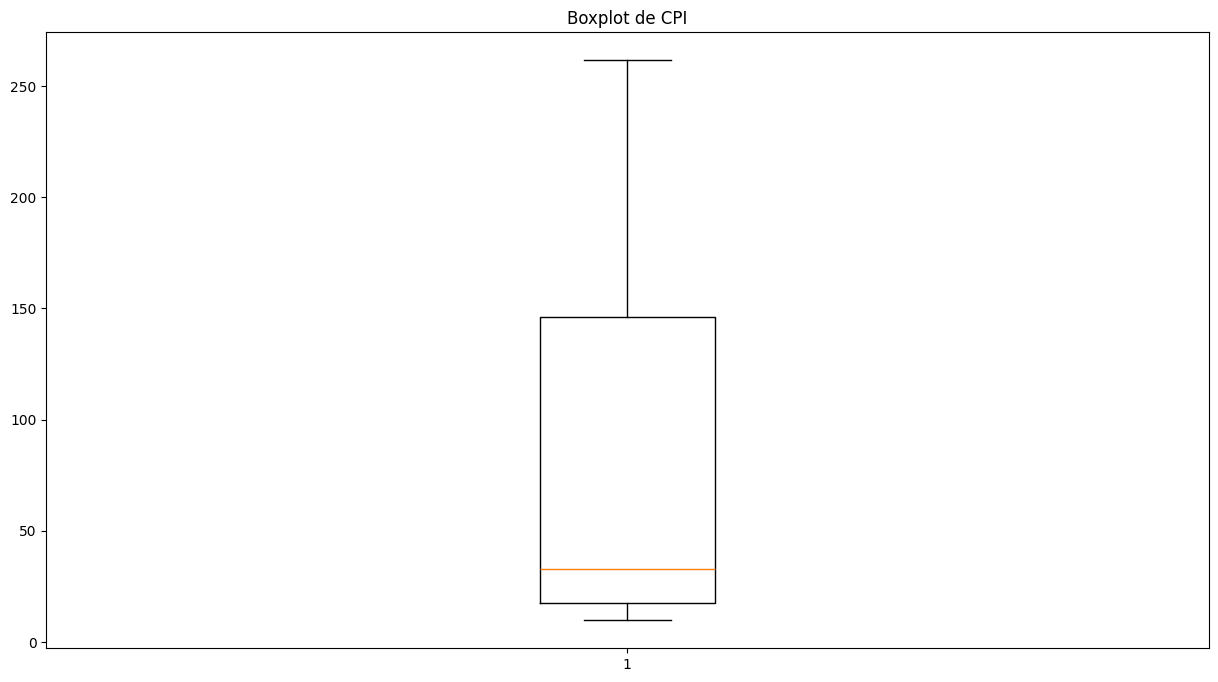

In [6]:
plot_boxplot(inflation,"CPI")

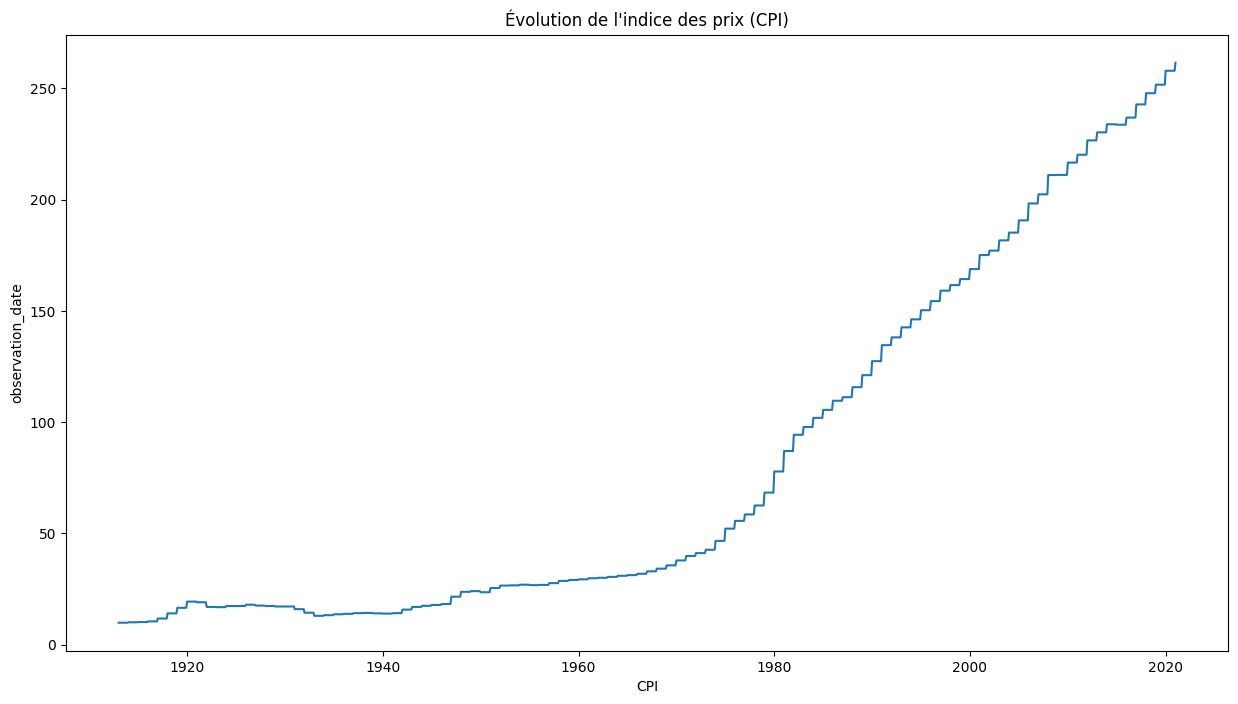

In [7]:
plot_datetime(inflation,"CPI",title="Évolution de l'indice des prix (CPI)")

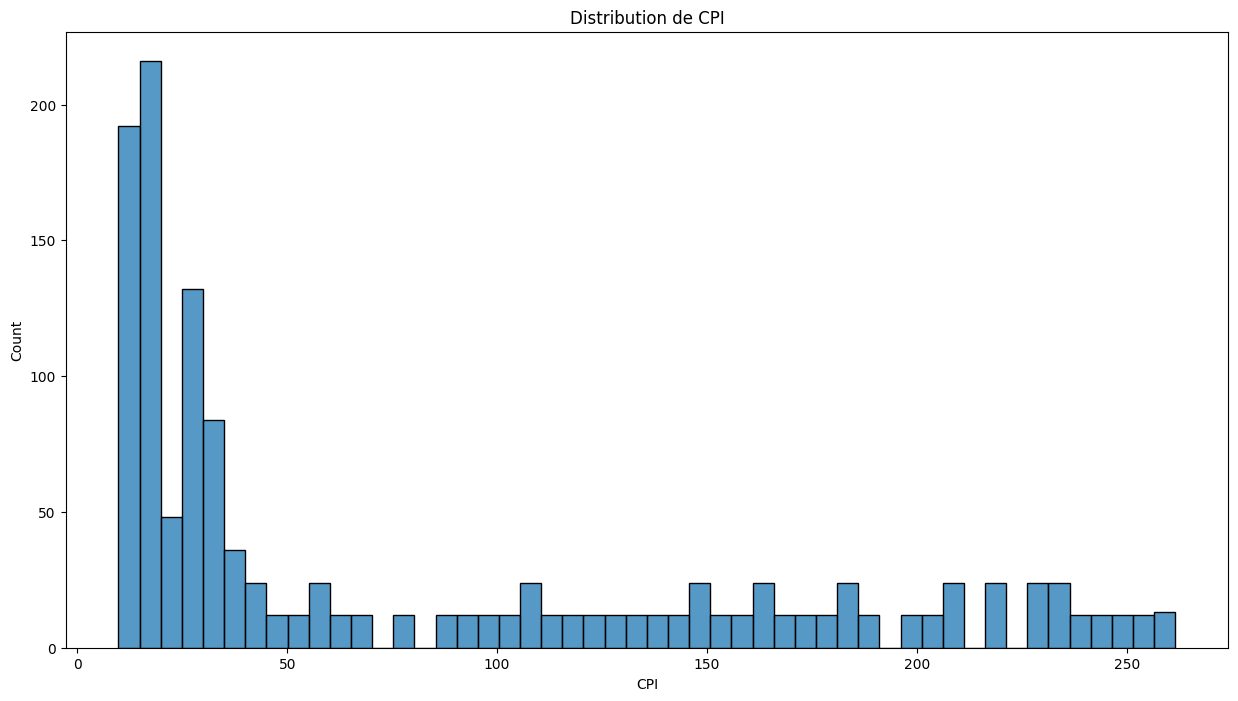

In [8]:

plot_histplot(inflation,"CPI")

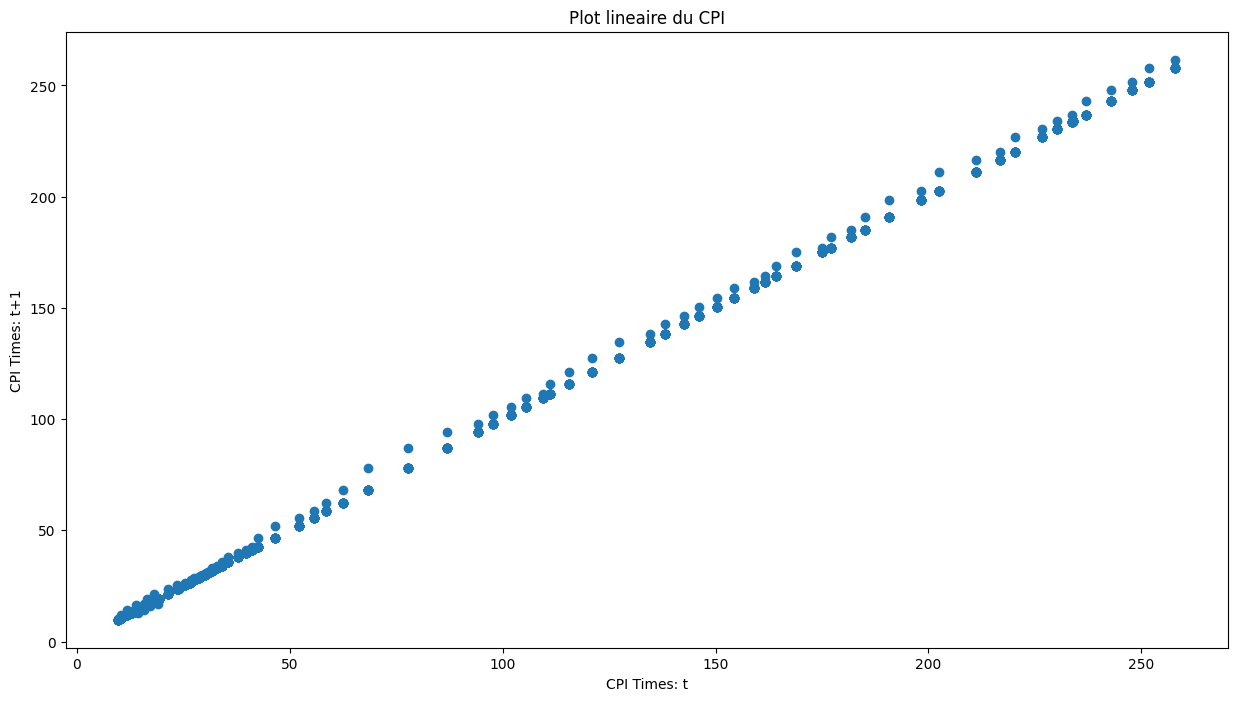

In [9]:
plot_linear(inflation["CPI"],"Plot lineaire du CPI")

### 2. Table StandarAndPoor

In [10]:
df = import_sp500_table(bdd)
df


,observation_date,sp500,dividend,earnings,longInterestRate,realPrice,realDividend,realEarnings
idSP,,,,,,,,
2,1871-01-01,4.515,0.26,0.40,5.335,111.325,6.41,9.86
3,1871-02-01,4.500,0.26,0.40,5.320,107.250,6.20,9.53
4,1871-03-01,4.610,0.26,0.40,5.330,108.270,6.11,9.39
5,1871-04-01,4.740,0.26,0.40,5.330,115.540,6.34,9.75
6,1871-05-01,4.860,0.26,0.40,5.330,121.220,6.48,9.98
...,...,...,...,...,...,...,...,...
1830,2023-05-01,4146.170,68.54,179.17,3.570,4173.450,68.99,180.35
1831,2023-06-01,4345.370,68.71,181.17,3.750,4359.880,68.94,181.77
1832,2023-07-01,4508.080,68.71,181.17,3.900,4514.510,68.94,181.77


In [11]:
df.describe()

,observation_date,sp500,dividend,earnings,longInterestRate,realPrice,realDividend,realEarnings
count,1833,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,1947-05-02 08:47:09,377.524667,7.592422,17.879746,4.489225,744.212207,20.331803,41.425355
min,1871-01-01 00:00:00,2.730000,0.180000,0.160000,0.620000,82.870000,6.110000,5.130000
25%,1909-03-01 00:00:00,8.010000,0.420000,0.575000,3.150000,210.600000,10.580000,15.910000
50%,1947-05-01 00:00:00,18.250000,0.930000,1.550000,3.800000,324.810000,16.230000,26.980000
75%,1985-07-01 00:00:00,184.900000,7.770000,15.010000,5.100000,812.870000,25.770000,50.030000
max,2023-09-01 00:00:00,4674.770000,68.710000,197.910000,15.320000,5140.590000,71.220000,217.260000
std,NaN,809.035051,13.876536,35.217780,2.300872,915.492443,13.650793,38.049710


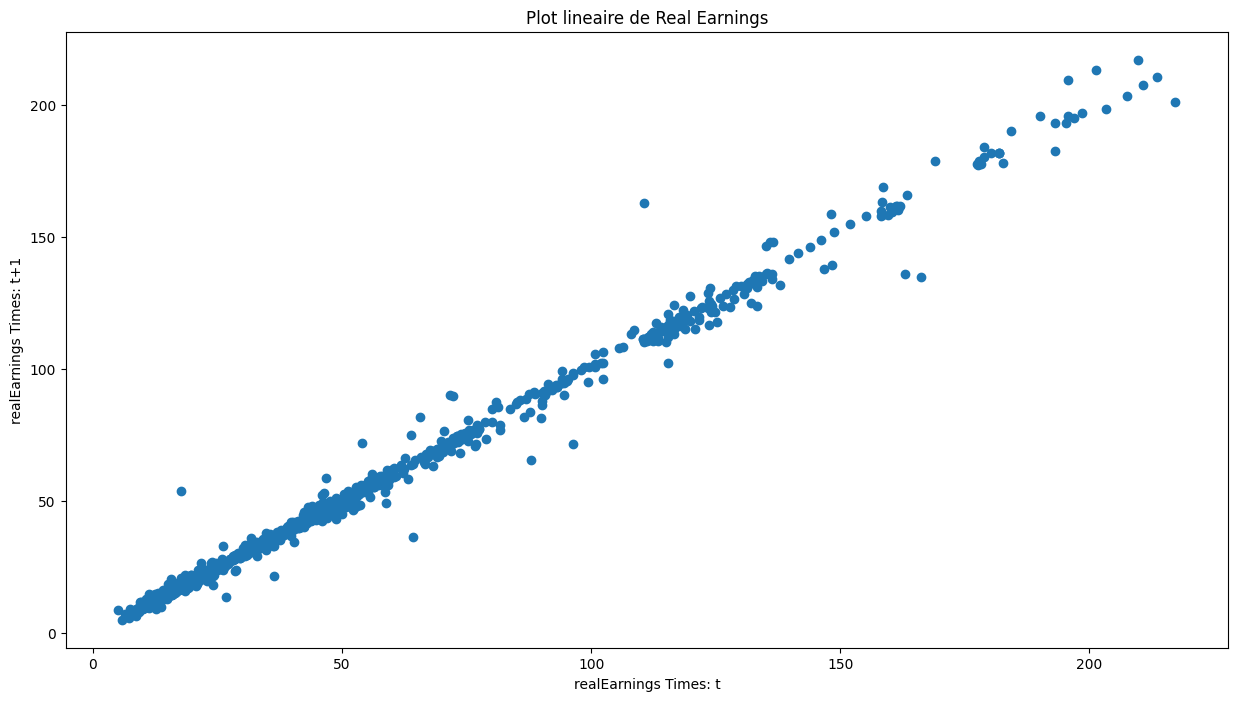

In [12]:
plot_linear(df["realEarnings"],title= "Plot lineaire de Real Earnings")



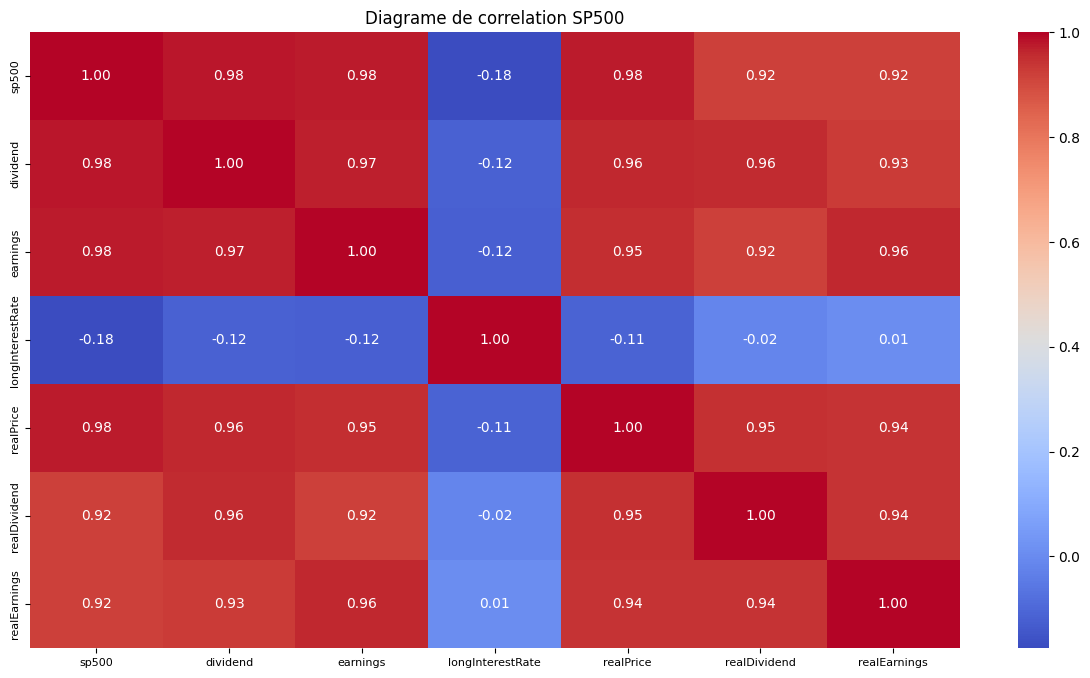

In [13]:
plot_corr(df.iloc[:, 1:],title="Diagrame de correlation SP500")

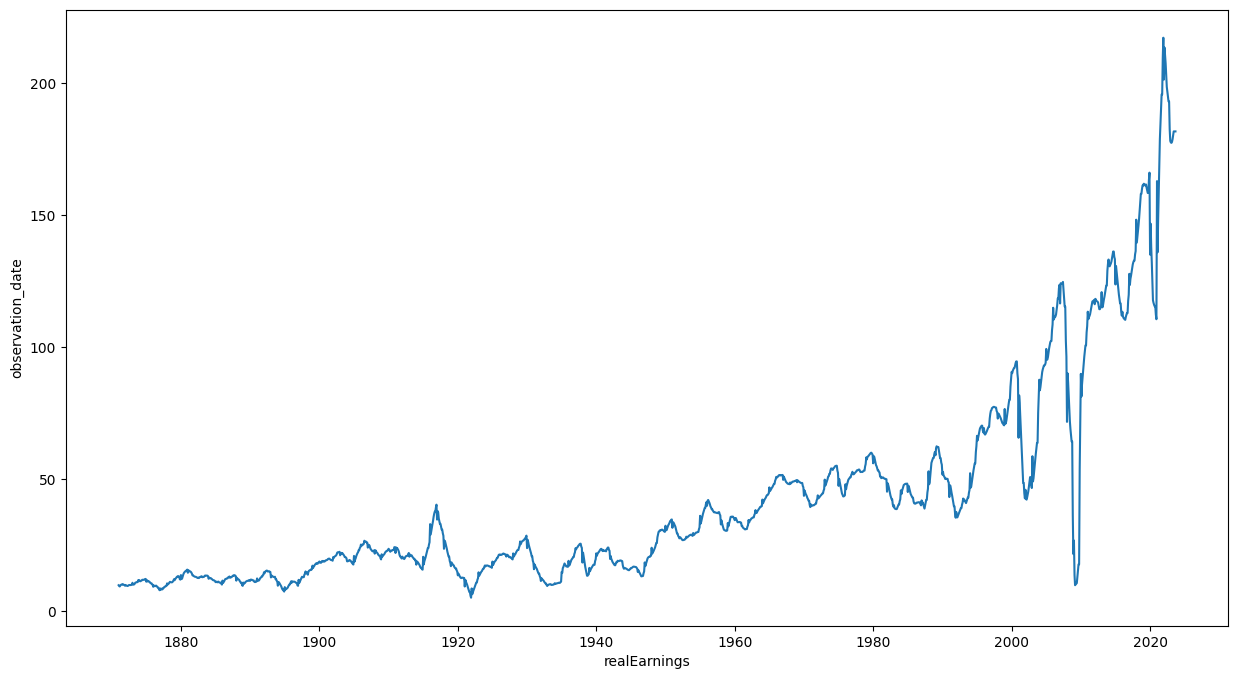

In [14]:
plot_datetime(df,"realEarnings")

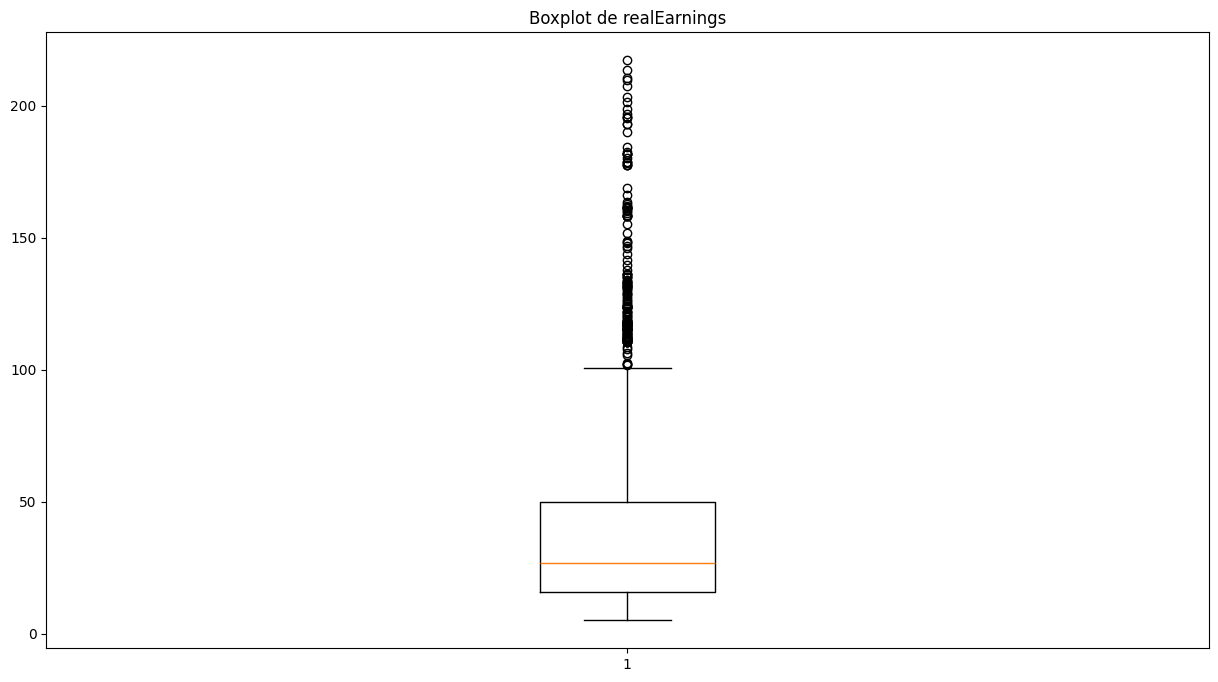

In [15]:
plot_boxplot(df,"realEarnings")